# Plot Multiple Regions

This file shows how to create visualizations of the covid219 data comparing different states or regions.
See plotOneRegion.py for an introduction to using the covid19 package.

First we import the module and matplotlib

In [1]:
from covid19 import *
import matplotlib.pyplot as plt

done


Here is 

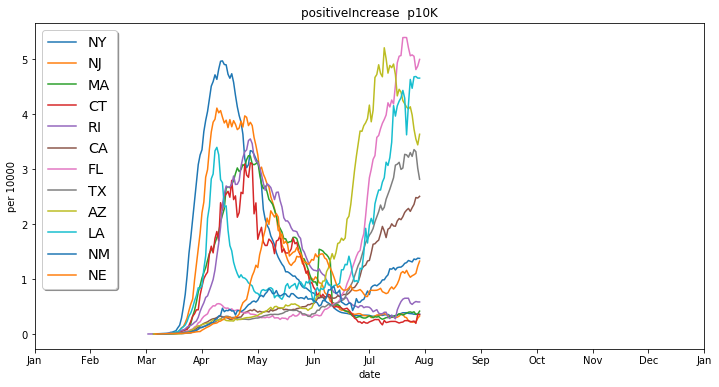

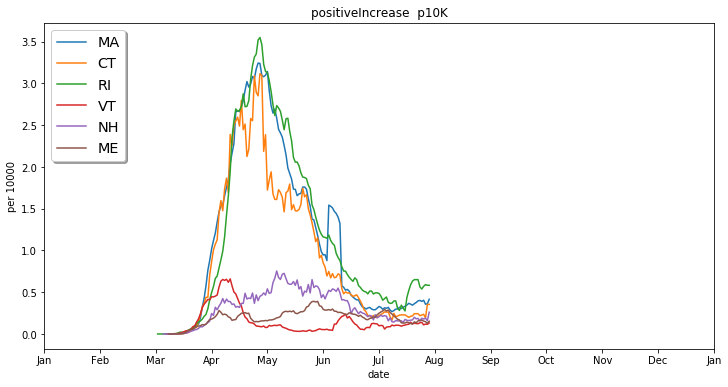

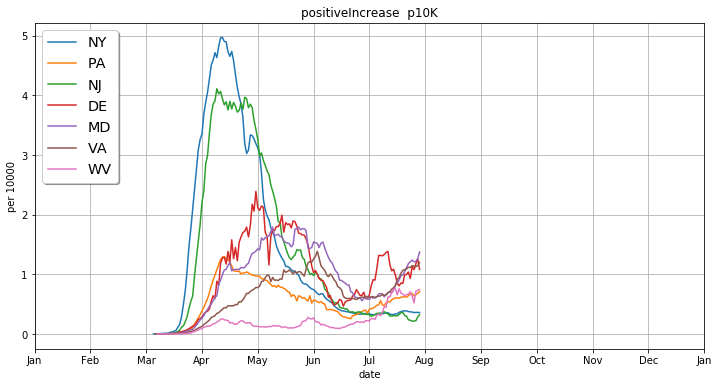

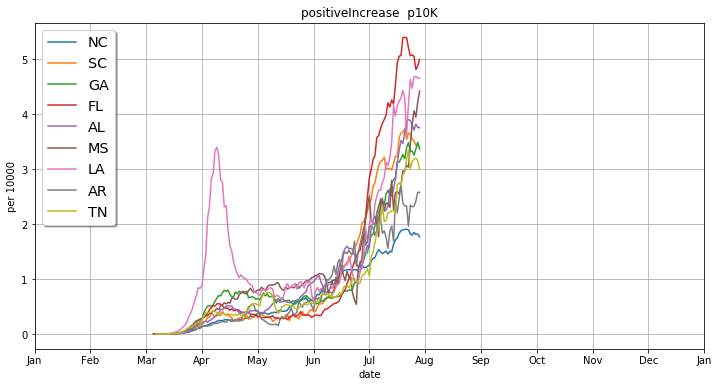

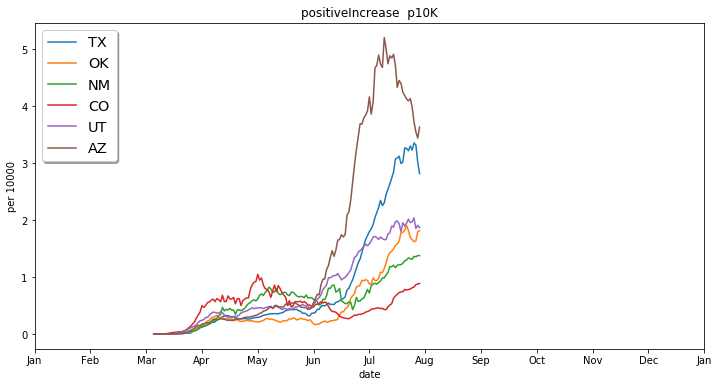

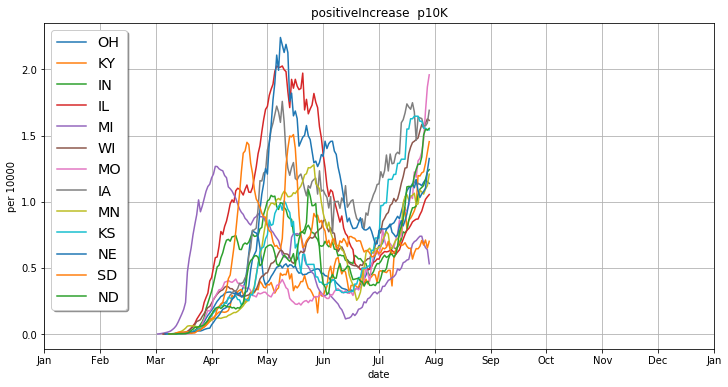

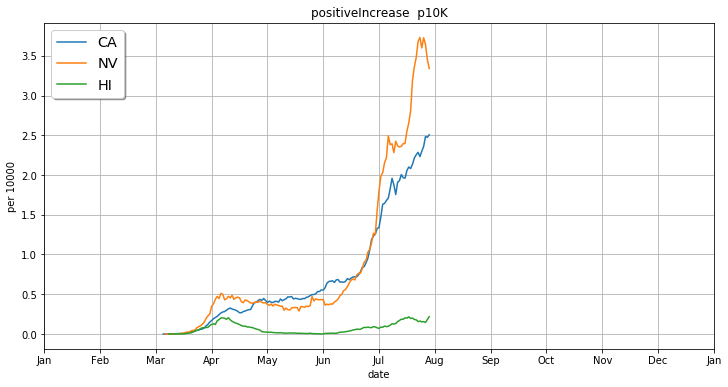

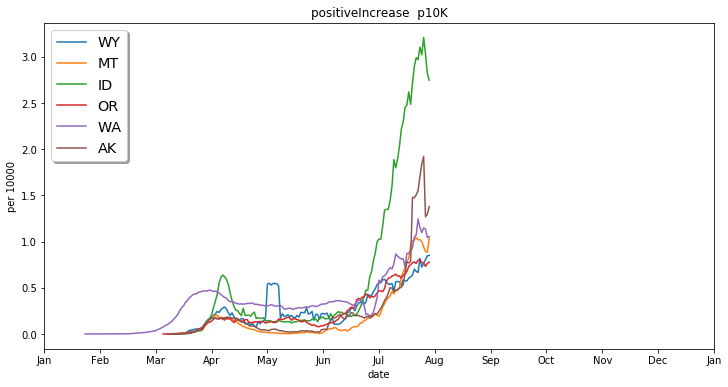

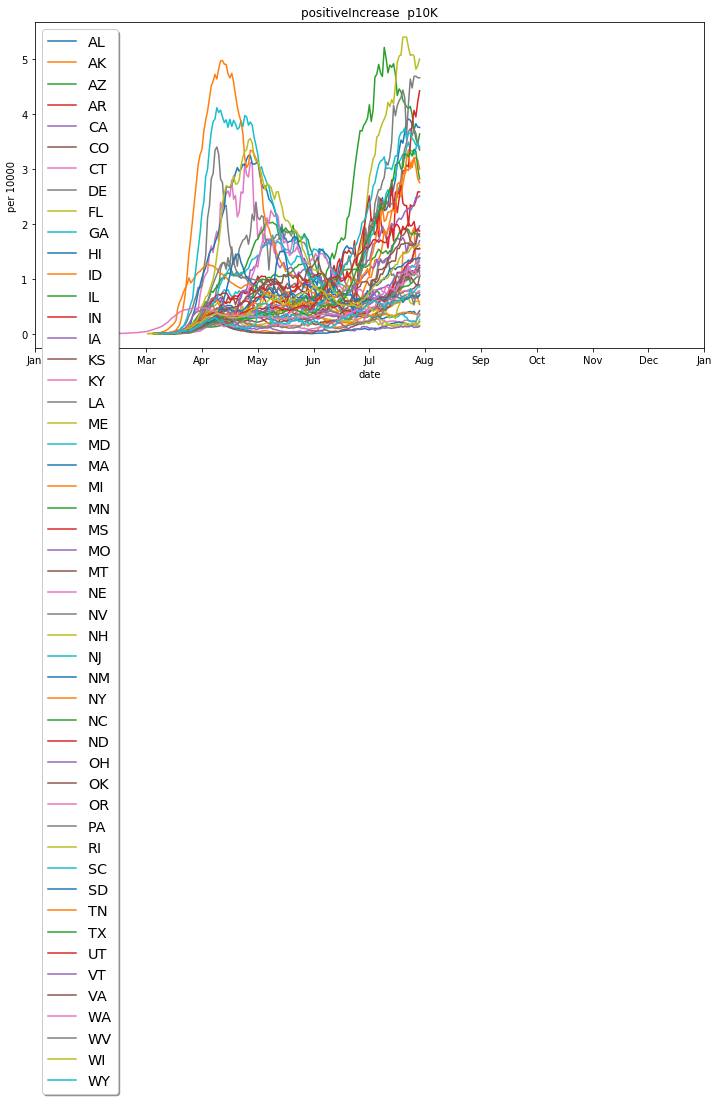

In [2]:

perCapita=True
averageByWeek=True
options = {'perCapita':perCapita,'averageByWeek':averageByWeek}

plt.rcParams['figure.figsize'] = [12, 6]
#fig, ax = plt.subplots()
#field = 'positive'
#field = 'recovered'
field = 'positiveIncrease'
#field = 'deathIncrease'
#field = "hospitalizedCurrently"
#field = "hospitalizedCumulative"
#field = "death"
#field = "positive"
#field = "hospitalized"
#field = "inIcuCurrently"
#field = "onVentilatorCurrently"
#field = "totalTestResultsIncrease"
## here we can plot all of the states!!
#for state in deepSouth:
#    plotItems(collectData([state],field,{'perCapita':perCapita,'averageByWeek':averageByWeek}),state)


i=0
for region in [
    ['NY','NJ','MA','CT','RI','CA','FL','TX','AZ','LA','NM','NE'],
    northEast,midAtlantic,southEast,southWest,midWest,west,northWest,states]:
  fig, ax = plt.subplots()
  for x in region:
    plotItems(collectData([x],field,options),x)
    ax.set(xlabel='day of year',
       ylabel='per 10000' if perCapita else "raw numbers",
       title=field+" "+(" p10K" if perCapita else " raw"))
    plt.xlabel('date')
    #plt.yticks(np.arange(0,6,step=0.5))
    legend = ax.legend(loc='upper left', shadow=True, fontsize='x-large')
    ax.grid()
    flag = x
  fig.savefig("plots/plotz_"+str(i)+" "+field+("_p10k" if perCapita else "_raw")+".png")
  i = i+1

The collectData function takes two parameters ... a list of states, and a field name.
It also has two optional parameters, perCapita (defaults to True) and averageByWeek (defaults to True).
It returns a list of tuples where the first is the day of the year (1/1/2020 = 1 and 12/31/2020 = 366)
and the second is the value of that field for that day (possibly divided by the state population and/or averaged over the past week).

Here is an example of using it to find the number of new cases per day in the last 10 days in MA.